In [1]:
from OpenCodeEval.utils import *

In [8]:
import json
import pickle
import zlib
import base64

for i in ['', '2', '3', '4', '5']:

    test_data = list(stream_jsonl(f"/home/ma-user/work/code_dev/liurb/github/dataset/code_generation_lite/test{i}.jsonl"))

    for data in test_data:

        data['public_test_cases'] = json.loads(data['public_test_cases'])

        try:
            data['private_test_cases'] = json.loads(data['private_test_cases'])  # type: ignore
        except:
            data['private_test_cases'] = json.loads(
                pickle.loads(
                    zlib.decompress(
                        base64.b64decode(data['private_test_cases'].encode("utf-8"))  # type: ignore
                    )
                )
            )  # type: ignore

        data['metadata'] = json.loads(data['metadata'])  # type: ignore

        if data['platform'] == 'leetcode':
            for case in data['public_test_cases']:
                assert case['testtype'] == 'functional'
            for case in data['private_test_cases']:
                assert case['testtype'] == 'functional'
            assert 'func_name' in data['metadata']
            assert data['starter_code'] != ''
        else:
            for case in data['public_test_cases']:
                assert case['testtype'] == 'stdin'
            for case in data['private_test_cases']:
                assert case['testtype'] == 'stdin'
            assert data['metadata'] == {}
            assert data['starter_code'] == ''

    # write_jsonl(f'/home/ma-user/work/code_dev/liurb/rlhf/livecodebench/test{i}.jsonl', test_data)

In [65]:
test_data = list(stream_jsonl('/home/ma-user/work/code_dev/liurb/rlhf/livecodebench/test1.jsonl'))

In [7]:
test_data[0]

{'question_title': 'Separated Lunch',
 'question_content': 'As KEYENCE headquarters have more and more workers, they decided to divide the departments in the headquarters into two groups and stagger their lunch breaks.\nKEYENCE headquarters have N departments, and the number of people in the i-th department (1\\leq i\\leq N) is K_i.\nWhen assigning each department to Group A or Group B, having each group take lunch breaks at the same time, and ensuring that the lunch break times of Group A and Group B do not overlap, find the minimum possible value of the maximum number of people taking a lunch break at the same time.\r\nIn other words, find the minimum possible value of the larger of the following: the total number of people in departments assigned to Group A, and the total number of people in departments assigned to Group B.\n\nInput\n\nThe input is given from Standard Input in the following format:\nN\r\nK_1 K_2 \\ldots K_N\n\nOutput\n\nPrint the minimum possible value of the maximu

In [9]:
import json
import pickle
import zlib
import base64

for i in ['', '2', '3', '4', '5']:

    test_data = list(stream_jsonl(f"/home/ma-user/work/code_dev/liurb/github/dataset/code_generation_lite/test{i}.jsonl"))

    for data in test_data:

        data['public_test_cases'] = json.loads(data['public_test_cases'])

        try:
            data['private_test_cases'] = json.loads(data['private_test_cases'])  # type: ignore
        except:
            data['private_test_cases'] = json.loads(
                pickle.loads(
                    zlib.decompress(
                        base64.b64decode(data['private_test_cases'].encode("utf-8"))  # type: ignore
                    )
                )
            )  # type: ignore

        data['metadata'] = json.loads(data['metadata'])  # type: ignore
        data['func_name'] = data['metadata']['func_name'] if 'func_name' in data['metadata'] else ''
        del data['metadata']

        for case in data['public_test_cases']:
            del case['testtype']
        for case in data['private_test_cases']:
            del case['testtype']

    write_jsonl(f'/home/ma-user/work/code_dev/liurb/rlhf/livecodebench/test{i}.jsonl', test_data)

In [79]:
i = '1'
test_data = list(stream_jsonl(f"/home/ma-user/work/code_dev/liurb/rlhf/livecodebench/test{i}.jsonl"))

In [82]:
for data in test_data:

    print(data['platform'])
    print(data['question_id'])

    if data['platform'] == 'atcoder':

        paltform_id = "1"
        contest, letter = data['question_id'].split('_')
        contest = ''.join(token for token in contest if token.isdigit())
        contest = contest.zfill(4)
            
        paltform_id =  paltform_id + contest + str(ord(letter) - ord('a') + 1)

    elif data['platform'] == 'codeforces':
        paltform_id = "2"
        contest, letter = data['question_id'].split('_')
        paltform_id =  paltform_id + contest + str(ord(letter) - ord('A') + 1)

    elif data['platform'] == 'leetcode':
        paltform_id = "3"
        paltform_id = paltform_id + data['question_id'] + "0"
    
    print(paltform_id)
    print("="*100)

codeforces
1873_A
218731
codeforces
1873_B
218732
codeforces
1873_D
218734
codeforces
1883_B
218832
codeforces
1883_C
218833
codeforces
1899_A
218991
codeforces
1899_B
218992
codeforces
1899_C
218993
codeforces
1899_D
218994
leetcode
2727
327270
leetcode
2728
327280
leetcode
2730
327300
leetcode
2754
327540
leetcode
2755
327550
leetcode
2756
327560
leetcode
2757
327570
leetcode
2777
327770
leetcode
2779
327790
leetcode
2784
327840
leetcode
2785
327850
leetcode
2786
327860
leetcode
2791
327910
leetcode
2792
327920
leetcode
2800
328000
leetcode
2802
328020
leetcode
2808
328080
leetcode
2810
328100
leetcode
2811
328110
leetcode
2812
328120
leetcode
2816
328160
leetcode
2817
328170
leetcode
2819
328190
leetcode
2824
328240
leetcode
2825
328250
leetcode
2827
328270
leetcode
2828
328280
leetcode
2831
328310
leetcode
2832
328320
leetcode
2833
328330
leetcode
2834
328340
leetcode
2837
328370
leetcode
2839
328390
leetcode
2844
328440
leetcode
2845
328450
leetcode
2847
328470
leetcode
2848
32848

In [58]:
test_data[0]

{'question_title': 'Separated Lunch',
 'question_content': 'As KEYENCE headquarters have more and more workers, they decided to divide the departments in the headquarters into two groups and stagger their lunch breaks.\nKEYENCE headquarters have N departments, and the number of people in the i-th department (1\\leq i\\leq N) is K_i.\nWhen assigning each department to Group A or Group B, having each group take lunch breaks at the same time, and ensuring that the lunch break times of Group A and Group B do not overlap, find the minimum possible value of the maximum number of people taking a lunch break at the same time.\r\nIn other words, find the minimum possible value of the larger of the following: the total number of people in departments assigned to Group A, and the total number of people in departments assigned to Group B.\n\nInput\n\nThe input is given from Standard Input in the following format:\nN\r\nK_1 K_2 \\ldots K_N\n\nOutput\n\nPrint the minimum possible value of the maximu

In [59]:
from collections import Counter

platform_counter = Counter()
for data in test_data:
    platform_counter[data['platform']] += 1

print(platform_counter)


Counter({'atcoder': 105, 'leetcode': 62})


In [49]:
from datetime import datetime

# 原始的时间字符串
date_str = '2023-08-21T00:00:00'

# 解析字符串为 datetime 对象
dt = datetime.fromisoformat(date_str)

# 格式化日期为 "YYYYMMDD" 格式，并转为整数
date_id = int(dt.strftime("%Y%m%d"))

print(date_id)  # 输出：20230821

20230821


In [20]:
version = 5
for i in range(1, version + 1):
    print(i)

1
2
3
4
5


In [90]:
result = '```sql SELECT movie_release_year, director_name FROM movies ORDER BY movie_release_year ASC LIMIT 1 ```'

def program_extract(text: str, program: str = "python") -> str:

    program_pattern = rf"```{program}[ \t]*[\r\n]+[ \t]*(.*?)[ \t]*[\r\n]+[ \t]*```"
    program_re = re.compile(program_pattern, re.DOTALL | re.IGNORECASE)

    matches = program_re.findall(text)  # 找到所有匹配项
    if matches:
        return matches[-1]  # 返回最后一个匹配的内容
    else:
        return ""

program_extract(result, program="sql")

''

In [88]:
markdown_extract(result)

''

In [91]:
data = {"id": 32, "db_id": "movie_platform", "sql": "SELECT T2.user_avatar_image_url FROM ratings AS T1 INNER JOIN ratings_users AS T2 ON T1.user_id = T2.user_id WHERE T2.user_id = 1103 AND rating_score = 5 AND T2.rating_date_utc = '2020-04-19'", "source": "e_sql", "instruction": "CREATE TABLE \"lists\"\n(\n    user_id                     INTEGER\n        references lists_users (user_id),\n    list_id                     INTEGER not null\n        primary key,\n    list_title                  TEXT,\n    list_movie_number           INTEGER,\n    list_update_timestamp_utc   TEXT,\n    list_creation_timestamp_utc TEXT,\n    list_followers              INTEGER,\n    list_url                    TEXT,\n    list_comments               INTEGER,\n    list_description            TEXT,\n    list_cover_image_url        TEXT,\n    list_first_image_url        TEXT,\n    list_second_image_url       TEXT,\n    list_third_image_url        TEXT\n);\n\nCREATE TABLE \"movies\"\n(\n    movie_id             INTEGER not null\n        primary key,\n    movie_title          TEXT,\n    movie_release_year   INTEGER,\n    movie_url            TEXT,\n    movie_title_language TEXT,\n    movie_popularity     INTEGER,\n    movie_image_url      TEXT,\n    director_id          TEXT,\n    director_name        TEXT,\n    director_url         TEXT\n);\n\nCREATE TABLE \"ratings_users\"\n(\n    user_id                 INTEGER\n        references lists_users (user_id),\n    rating_date_utc         TEXT,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_avatar_image_url   TEXT,\n    user_cover_image_url    TEXT,\n    user_eligible_for_trial INTEGER,\n    user_has_payment_method INTEGER\n);\n\nCREATE TABLE lists_users\n(\n    user_id                 INTEGER not null ,\n    list_id                 INTEGER not null ,\n    list_update_date_utc    TEXT,\n    list_creation_date_utc  TEXT,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_avatar_image_url   TEXT,\n    user_cover_image_url    TEXT,\n    user_eligible_for_trial TEXT,\n    user_has_payment_method TEXT,\n    primary key (user_id, list_id),\n    foreign key (list_id) references lists(list_id),\n    foreign key (user_id) references lists(user_id)\n);\n\nCREATE TABLE ratings\n(\n    movie_id                INTEGER,\n    rating_id               INTEGER,\n    rating_url              TEXT,\n    rating_score            INTEGER,\n    rating_timestamp_utc    TEXT,\n    critic                  TEXT,\n    critic_likes            INTEGER,\n    critic_comments         INTEGER,\n    user_id                 INTEGER,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_eligible_for_trial INTEGER,\n    user_has_payment_method INTEGER,\n    foreign key (movie_id) references movies(movie_id),\n    foreign key (user_id) references lists_users(user_id),\n    foreign key (rating_id) references ratings(rating_id),\n    foreign key (user_id) references ratings_users(user_id)\n);\n\n-- External Knowledge: URL to the user profile image on Mubi\u00a0 refers to user_avatar_image_url;\u00a0 4/19/2020 refers to rating_date_utc\n\n-- Using valid SQLite and understanding External Knowledge, answer the following questions for the tables provided above.\n\nQuestion: What is the URL to the user profile image on Mubi of the user who gave the movie id of 1103 a 5 ratinng score on 4/19/2020?\n\nPlease output valid SQLite query that solves the qustion in a markdown code block.", "response": "The original question can be enriched as: Please find the URL to the user profile image (ratings_users.user_avatar_image_url) on Mubi of the user who gave a rating score of 5 (ratings.rating_score = 5) to the movie with movie id 1103 (ratings.movie_id = 1103) on the date 4/19/2020 (ratings_users.rating_date_utc = '4/19/2020'). Join the ratings and ratings_users tables on user_id column of both tables. Apply the conditions for movie id (ratings.movie_id = 1103), rating score (ratings.rating_score = 5), and rating date (ratings_users.rating_date_utc = '4/19/2020'). Select the user profile image URL (ratings_users.user_avatar_image_url).\n\nWe can solve the given question with the following enrichment reasoning steps: The URL to the user profile image can be found from the user_avatar_image_url column of the ratings_users table in the database. The information about the rating score and the movie id can be found from the ratings table in the database. The date of the rating can be found from the rating_date_utc column of the ratings_users table. It is asked to find the URL to the user profile image (ratings_users.user_avatar_image_url) of the user who gave a rating score of 5 (ratings.rating_score = 5) to the movie with movie id 1103 (ratings.movie_id = 1103) on the date 4/19/2020 (ratings_users.rating_date_utc = '4/19/2020'). In order to combine and match the rating information and user profile image information, joining ratings table and ratings_users table is required. Since the user_id column of the ratings table references to the user_id column of the ratings_users table, the joining of both tables should be done on user_id columns of both tables. After applying the conditions for movie id (ratings.movie_id = 1103), rating score (ratings.rating_score = 5), and rating date (ratings_users.rating_date_utc = '4/19/2020'), the user profile image URL (ratings_users.user_avatar_image_url) should be selected.\n\nSo, the final sqlite SQL query answer to the given question is: ```sql SELECT T2.user_avatar_image_url FROM ratings AS T1 INNER JOIN ratings_users AS T2 ON T1.user_id = T2.user_id WHERE T1.movie_id = 1103 AND T1.rating_score = 5 AND T2.rating_date_utc = '4/19/2020' ```\n\nI reflected on my result and I found nothing wrong in my answer. The SQL query will solve the question and match the expected output."}


In [92]:
data

{'id': 32,
 'db_id': 'movie_platform',
 'sql': "SELECT T2.user_avatar_image_url FROM ratings AS T1 INNER JOIN ratings_users AS T2 ON T1.user_id = T2.user_id WHERE T2.user_id = 1103 AND rating_score = 5 AND T2.rating_date_utc = '2020-04-19'",
 'source': 'e_sql',
 'instruction': 'CREATE TABLE "lists"\n(\n    user_id                     INTEGER\n        references lists_users (user_id),\n    list_id                     INTEGER not null\n        primary key,\n    list_title                  TEXT,\n    list_movie_number           INTEGER,\n    list_update_timestamp_utc   TEXT,\n    list_creation_timestamp_utc TEXT,\n    list_followers              INTEGER,\n    list_url                    TEXT,\n    list_comments               INTEGER,\n    list_description            TEXT,\n    list_cover_image_url        TEXT,\n    list_first_image_url        TEXT,\n    list_second_image_url       TEXT,\n    list_third_image_url        TEXT\n);\n\nCREATE TABLE "movies"\n(\n    movie_id             INTEGER

In [94]:
label= {"id": 32, "db_id": "movie_platform", "question": "What is the URL to the user profile image on Mubi of the user who gave the movie id of 1103 a 5 ratinng score on 4/19/2020?", "evidence": "URL to the user profile image on Mubi\u00a0 refers to user_avatar_image_url;\u00a0 4/19/2020 refers to rating_date_utc", "schema": "CREATE TABLE \"lists\"\n(\n    user_id                     INTEGER\n        references lists_users (user_id),\n    list_id                     INTEGER not null\n        primary key,\n    list_title                  TEXT,\n    list_movie_number           INTEGER,\n    list_update_timestamp_utc   TEXT,\n    list_creation_timestamp_utc TEXT,\n    list_followers              INTEGER,\n    list_url                    TEXT,\n    list_comments               INTEGER,\n    list_description            TEXT,\n    list_cover_image_url        TEXT,\n    list_first_image_url        TEXT,\n    list_second_image_url       TEXT,\n    list_third_image_url        TEXT\n);\n\nCREATE TABLE \"movies\"\n(\n    movie_id             INTEGER not null\n        primary key,\n    movie_title          TEXT,\n    movie_release_year   INTEGER,\n    movie_url            TEXT,\n    movie_title_language TEXT,\n    movie_popularity     INTEGER,\n    movie_image_url      TEXT,\n    director_id          TEXT,\n    director_name        TEXT,\n    director_url         TEXT\n);\n\nCREATE TABLE \"ratings_users\"\n(\n    user_id                 INTEGER\n        references lists_users (user_id),\n    rating_date_utc         TEXT,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_avatar_image_url   TEXT,\n    user_cover_image_url    TEXT,\n    user_eligible_for_trial INTEGER,\n    user_has_payment_method INTEGER\n);\n\nCREATE TABLE lists_users\n(\n    user_id                 INTEGER not null ,\n    list_id                 INTEGER not null ,\n    list_update_date_utc    TEXT,\n    list_creation_date_utc  TEXT,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_avatar_image_url   TEXT,\n    user_cover_image_url    TEXT,\n    user_eligible_for_trial TEXT,\n    user_has_payment_method TEXT,\n    primary key (user_id, list_id),\n    foreign key (list_id) references lists(list_id),\n    foreign key (user_id) references lists(user_id)\n);\n\nCREATE TABLE ratings\n(\n    movie_id                INTEGER,\n    rating_id               INTEGER,\n    rating_url              TEXT,\n    rating_score            INTEGER,\n    rating_timestamp_utc    TEXT,\n    critic                  TEXT,\n    critic_likes            INTEGER,\n    critic_comments         INTEGER,\n    user_id                 INTEGER,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_eligible_for_trial INTEGER,\n    user_has_payment_method INTEGER,\n    foreign key (movie_id) references movies(movie_id),\n    foreign key (user_id) references lists_users(user_id),\n    foreign key (rating_id) references ratings(rating_id),\n    foreign key (user_id) references ratings_users(user_id)\n);\n\n", "sql": "SELECT T2.user_avatar_image_url FROM ratings AS T1 INNER JOIN ratings_users AS T2 ON T1.user_id = T2.user_id WHERE T2.user_id = 1103 AND rating_score = 5 AND T2.rating_date_utc = '2020-04-19'", "prompt": "CREATE TABLE \"lists\"\n(\n    user_id                     INTEGER\n        references lists_users (user_id),\n    list_id                     INTEGER not null\n        primary key,\n    list_title                  TEXT,\n    list_movie_number           INTEGER,\n    list_update_timestamp_utc   TEXT,\n    list_creation_timestamp_utc TEXT,\n    list_followers              INTEGER,\n    list_url                    TEXT,\n    list_comments               INTEGER,\n    list_description            TEXT,\n    list_cover_image_url        TEXT,\n    list_first_image_url        TEXT,\n    list_second_image_url       TEXT,\n    list_third_image_url        TEXT\n);\n\nCREATE TABLE \"movies\"\n(\n    movie_id             INTEGER not null\n        primary key,\n    movie_title          TEXT,\n    movie_release_year   INTEGER,\n    movie_url            TEXT,\n    movie_title_language TEXT,\n    movie_popularity     INTEGER,\n    movie_image_url      TEXT,\n    director_id          TEXT,\n    director_name        TEXT,\n    director_url         TEXT\n);\n\nCREATE TABLE \"ratings_users\"\n(\n    user_id                 INTEGER\n        references lists_users (user_id),\n    rating_date_utc         TEXT,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_avatar_image_url   TEXT,\n    user_cover_image_url    TEXT,\n    user_eligible_for_trial INTEGER,\n    user_has_payment_method INTEGER\n);\n\nCREATE TABLE lists_users\n(\n    user_id                 INTEGER not null ,\n    list_id                 INTEGER not null ,\n    list_update_date_utc    TEXT,\n    list_creation_date_utc  TEXT,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_avatar_image_url   TEXT,\n    user_cover_image_url    TEXT,\n    user_eligible_for_trial TEXT,\n    user_has_payment_method TEXT,\n    primary key (user_id, list_id),\n    foreign key (list_id) references lists(list_id),\n    foreign key (user_id) references lists(user_id)\n);\n\nCREATE TABLE ratings\n(\n    movie_id                INTEGER,\n    rating_id               INTEGER,\n    rating_url              TEXT,\n    rating_score            INTEGER,\n    rating_timestamp_utc    TEXT,\n    critic                  TEXT,\n    critic_likes            INTEGER,\n    critic_comments         INTEGER,\n    user_id                 INTEGER,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_eligible_for_trial INTEGER,\n    user_has_payment_method INTEGER,\n    foreign key (movie_id) references movies(movie_id),\n    foreign key (user_id) references lists_users(user_id),\n    foreign key (rating_id) references ratings(rating_id),\n    foreign key (user_id) references ratings_users(user_id)\n);\n\n-- External Knowledge: URL to the user profile image on Mubi\u00a0 refers to user_avatar_image_url;\u00a0 4/19/2020 refers to rating_date_utc\n\n-- Using valid SQLite and understanding External Knowledge, answer the following questions for the tables provided above.\n\nQuestion: What is the URL to the user profile image on Mubi of the user who gave the movie id of 1103 a 5 ratinng score on 4/19/2020?\n", "instruction": "CREATE TABLE \"lists\"\n(\n    user_id                     INTEGER\n        references lists_users (user_id),\n    list_id                     INTEGER not null\n        primary key,\n    list_title                  TEXT,\n    list_movie_number           INTEGER,\n    list_update_timestamp_utc   TEXT,\n    list_creation_timestamp_utc TEXT,\n    list_followers              INTEGER,\n    list_url                    TEXT,\n    list_comments               INTEGER,\n    list_description            TEXT,\n    list_cover_image_url        TEXT,\n    list_first_image_url        TEXT,\n    list_second_image_url       TEXT,\n    list_third_image_url        TEXT\n);\n\nCREATE TABLE \"movies\"\n(\n    movie_id             INTEGER not null\n        primary key,\n    movie_title          TEXT,\n    movie_release_year   INTEGER,\n    movie_url            TEXT,\n    movie_title_language TEXT,\n    movie_popularity     INTEGER,\n    movie_image_url      TEXT,\n    director_id          TEXT,\n    director_name        TEXT,\n    director_url         TEXT\n);\n\nCREATE TABLE \"ratings_users\"\n(\n    user_id                 INTEGER\n        references lists_users (user_id),\n    rating_date_utc         TEXT,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_avatar_image_url   TEXT,\n    user_cover_image_url    TEXT,\n    user_eligible_for_trial INTEGER,\n    user_has_payment_method INTEGER\n);\n\nCREATE TABLE lists_users\n(\n    user_id                 INTEGER not null ,\n    list_id                 INTEGER not null ,\n    list_update_date_utc    TEXT,\n    list_creation_date_utc  TEXT,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_avatar_image_url   TEXT,\n    user_cover_image_url    TEXT,\n    user_eligible_for_trial TEXT,\n    user_has_payment_method TEXT,\n    primary key (user_id, list_id),\n    foreign key (list_id) references lists(list_id),\n    foreign key (user_id) references lists(user_id)\n);\n\nCREATE TABLE ratings\n(\n    movie_id                INTEGER,\n    rating_id               INTEGER,\n    rating_url              TEXT,\n    rating_score            INTEGER,\n    rating_timestamp_utc    TEXT,\n    critic                  TEXT,\n    critic_likes            INTEGER,\n    critic_comments         INTEGER,\n    user_id                 INTEGER,\n    user_trialist           INTEGER,\n    user_subscriber         INTEGER,\n    user_eligible_for_trial INTEGER,\n    user_has_payment_method INTEGER,\n    foreign key (movie_id) references movies(movie_id),\n    foreign key (user_id) references lists_users(user_id),\n    foreign key (rating_id) references ratings(rating_id),\n    foreign key (user_id) references ratings_users(user_id)\n);\n\n-- External Knowledge: URL to the user profile image on Mubi\u00a0 refers to user_avatar_image_url;\u00a0 4/19/2020 refers to rating_date_utc\n\n-- Using valid SQLite and understanding External Knowledge, answer the following questions for the tables provided above.\n\nQuestion: What is the URL to the user profile image on Mubi of the user who gave the movie id of 1103 a 5 ratinng score on 4/19/2020?\n\nPlease output valid SQLite query that solves the qustion in a markdown code block.", "label": "The original question can be enriched as: Please find the URL to the user profile image (ratings_users.user_avatar_image_url) on Mubi of the user who gave a rating score of 5 (ratings.rating_score = 5) to the movie with movie id 1103 (ratings.movie_id = 1103) on the date 4/19/2020 (ratings_users.rating_date_utc = '4/19/2020'). Join the ratings and ratings_users tables on user_id column of both tables. Apply the conditions for movie id (ratings.movie_id = 1103), rating score (ratings.rating_score = 5), and rating date (ratings_users.rating_date_utc = '4/19/2020'). Select the user profile image URL (ratings_users.user_avatar_image_url).\n\nWe can solve the given question with the following enrichment reasoning steps: The URL to the user profile image can be found from the user_avatar_image_url column of the ratings_users table in the database. The information about the rating score and the movie id can be found from the ratings table in the database. The date of the rating can be found from the rating_date_utc column of the ratings_users table. It is asked to find the URL to the user profile image (ratings_users.user_avatar_image_url) of the user who gave a rating score of 5 (ratings.rating_score = 5) to the movie with movie id 1103 (ratings.movie_id = 1103) on the date 4/19/2020 (ratings_users.rating_date_utc = '4/19/2020'). In order to combine and match the rating information and user profile image information, joining ratings table and ratings_users table is required. Since the user_id column of the ratings table references to the user_id column of the ratings_users table, the joining of both tables should be done on user_id columns of both tables. After applying the conditions for movie id (ratings.movie_id = 1103), rating score (ratings.rating_score = 5), and rating date (ratings_users.rating_date_utc = '4/19/2020'), the user profile image URL (ratings_users.user_avatar_image_url) should be selected.\n\nSo, the final sqlite SQL query answer to the given question is: ```sql SELECT T2.user_avatar_image_url FROM ratings AS T1 INNER JOIN ratings_users AS T2 ON T1.user_id = T2.user_id WHERE T1.movie_id = 1103 AND T1.rating_score = 5 AND T2.rating_date_utc = '4/19/2020' ```", "execute": {"generated_sql": "", "match": 1, "status": "success", "detail": None}}


In [95]:
label

{'id': 32,
 'db_id': 'movie_platform',
 'question': 'What is the URL to the user profile image on Mubi of the user who gave the movie id of 1103 a 5 ratinng score on 4/19/2020?',
 'evidence': 'URL to the user profile image on Mubi\xa0 refers to user_avatar_image_url;\xa0 4/19/2020 refers to rating_date_utc',
 'schema': 'CREATE TABLE "lists"\n(\n    user_id                     INTEGER\n        references lists_users (user_id),\n    list_id                     INTEGER not null\n        primary key,\n    list_title                  TEXT,\n    list_movie_number           INTEGER,\n    list_update_timestamp_utc   TEXT,\n    list_creation_timestamp_utc TEXT,\n    list_followers              INTEGER,\n    list_url                    TEXT,\n    list_comments               INTEGER,\n    list_description            TEXT,\n    list_cover_image_url        TEXT,\n    list_first_image_url        TEXT,\n    list_second_image_url       TEXT,\n    list_third_image_url        TEXT\n);\n\nCREATE TABLE "m

In [1]:
import sqlite3

from OpenCodeEval.utils import *

dataset = list(stream_jsonl('/home/ma-user/work/code_dev/liurb/nlp2sql/dataset/train_chess_correct.jsonl'))[:9428]

num = 0

def sql(data):
    
    db_id = data['db_id']
    generated_sql = data['execute']['generated_sql']
    gold_sql = data['sql']

    db_file = f"/cache/sql/{db_id}.sqlite"

    try:

        with sqlite3.connect(db_file) as conn:
            cursor = conn.cursor()

            # cursor.execute(generated_sql)
            # predicted_result = cursor.fetchall()

            cursor.execute(gold_sql)
            ground_truth_result = cursor.fetchall()

            # match_result = 0

            # if set(predicted_result) == set(ground_truth_result):
            #     match_result = 1

            if ground_truth_result == []:
                return 1
            else:
                return 0

    except Exception as e:
        return 0

from tqdm.contrib.concurrent import thread_map

result = thread_map(sql, dataset, chunksize=1, max_workers=100)


  0%|          | 0/9428 [00:00<?, ?it/s]

KeyboardInterrupt: 

p = 0.00 -> P(0) = 1.00, P(1) = 0.00
p = 0.10 -> P(0) = 0.90, P(1) = 0.10
p = 0.20 -> P(0) = 0.80, P(1) = 0.20
p = 0.30 -> P(0) = 0.70, P(1) = 0.30
p = 0.40 -> P(0) = 0.60, P(1) = 0.40
p = 0.50 -> P(0) = 0.50, P(1) = 0.50
p = 0.60 -> P(0) = 0.40, P(1) = 0.60
p = 0.70 -> P(0) = 0.30, P(1) = 0.70
p = 0.80 -> P(0) = 0.20, P(1) = 0.80
p = 0.90 -> P(0) = 0.10, P(1) = 0.90
p = 1.00 -> P(0) = 0.00, P(1) = 1.00


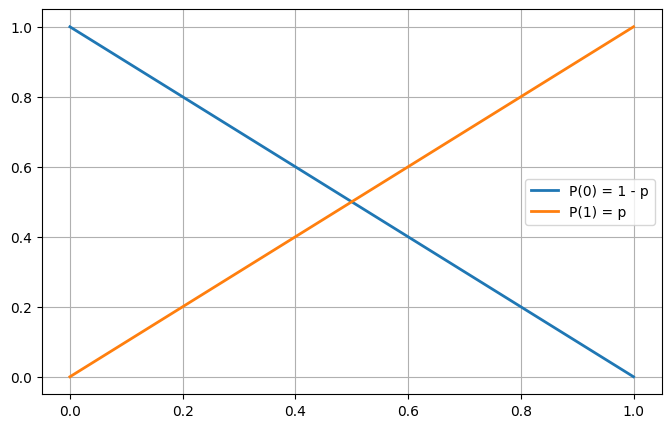

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli_distribution(p):
    """
    计算伯努利分布（0-1 分布）的概率
    参数:
        p: 成功（取 1）的概率，取值在 [0,1]
    返回:
        一个 numpy 数组, 第一个元素为 P(0)=1-p, 第二个元素为 P(1)=p
    """
    return np.array([1 - p, p])

# 设置 p 值的范围，这里以 0 到 1 为例，共 101 个点
p_values = np.linspace(0, 1, 101)

# 针对每个 p 值计算对应的概率
probs = np.array([bernoulli_distribution(p) for p in p_values])
p0 = probs[:, 0]  # P(0)
p1 = probs[:, 1]  # P(1)

# 输出部分结果
for p, prob in zip(p_values[::10], probs[::10]):  # 每隔 10 个点输出一次
    print(f"p = {p:.2f} -> P(0) = {prob[0]:.2f}, P(1) = {prob[1]:.2f}")

# 绘制概率随 p 值变化的曲线
plt.figure(figsize=(8, 5))
plt.plot(p_values, p0, label="P(0) = 1 - p", linewidth=2)
plt.plot(p_values, p1, label="P(1) = p", linewidth=2)

plt.legend()
plt.grid(True)
plt.show()

In [22]:
import numpy as np

def bernoulli_distribution(p, n):
    """
    生成伯努利分布（0-1 分布）的随机样本
    参数:
        p: 成功（取 1）的概率，取值在 [0,1]
        n: 试验次数
    返回:
        长度为 n 的列表，包含 0 或 1 的随机样本
    """
    # 使用 np.random.binomial 生成伯努利随机样本，1 表示成功，0 表示失败
    return np.random.binomial(1, p, n).tolist()

# 调用示例，生成 200 次试验的样本，成功概率为 0.5
sample = bernoulli_distribution(0.99, 1000)

#normlize
mean = np.mean(sample)
std = np.std(sample)

sample = [(x - mean) / (std + 1e-9) for x in sample]

print(max(sample))


0.09529813968938776


In [25]:
import torch.distributions as dis
import torch
p = dis.Normal(loc=0, scale=1)
q = dis.Normal(loc=0.1, scale=0.2)
x = q.sample(sample_shape=(10_000,))
truekl = dis.kl_divergence(q, p)
print("true", truekl)
logr = p.log_prob(x) - q.log_prob(x)
k1 = -logr
k2 = logr ** 2 / 2
k3 = (logr.exp() - 1) - logr
k4 = torch.where(logr < 0, k3, torch.min(logr, k3))
r = torch.exp(logr)
clip_r = torch.clamp(r,max=6)
k3_clip = clip_r - 1 - logr
k3_clip_pos = torch.where(k3_clip < 0, 0, k3_clip)
k5 = (logr)**2 / 2.
k6 = torch.clamp(p.log_prob(x).exp() - q.log_prob(x).exp(), max=1-1e-10, min=0+1e-10) / p.log_prob(x).exp() / q.log_prob(x).exp()
for k in (k1, k2, k3, k4, k3_clip, k3_clip_pos, k5, k6):
    print((k.mean() - truekl) / truekl, k.std() / truekl)

true tensor(1.1344)
tensor(-0.0018) tensor(0.5991)
tensor(-0.2313) tensor(0.4812)
tensor(-0.3588) tensor(4.5881)
tensor(-0.4851) tensor(0.2871)
tensor(-0.4824) tensor(0.2980)
tensor(-0.4822) tensor(0.2976)
tensor(-0.2313) tensor(0.4812)
tensor(-0.3524) tensor(14.9506)


In [26]:
truekl

tensor(1.1344)

In [27]:
k6.mean()

tensor(0.7347)